In [756]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [757]:
import numpy as np
import seaborn as sns

In [758]:
plt.rcParams['figure.figsize'] = (16,9)

In [759]:
#sns.set(rc={'figure.figsize': (16, 9)})

In [760]:
def abline(intercept, slope):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', c='orange')

Let's make some fake data. Generate some random vectors, $x_1$ and $x_2$. Then we make a relationship:

$$ y = x_1 + x_2 + \text{random noise}$$

In [761]:
X = np.random.normal(scale=3, size=(1000, 2))
random_noise = np.random.normal(scale=0.5, size=(1000,))
y = X[:,0] + X[:,1] + random_noise 

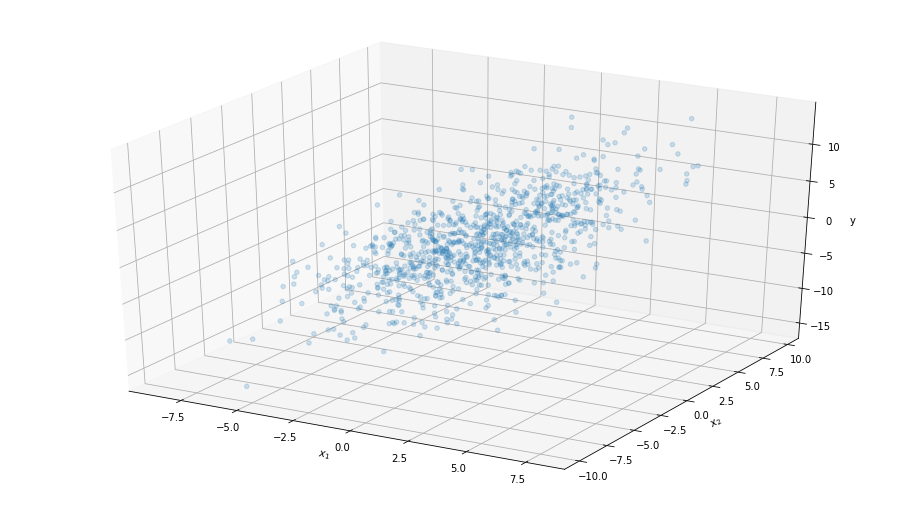

In [762]:
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], y, alpha=0.2);
ax.set_zlabel('y');
ax.set_xlabel('$x_1$');
ax.set_ylabel('$x_2$');

Now let's see how a linear model can be fit to this fake data and how predictions match reality. We fit the model on 2/3 of the data and test it on the 1/3 which was unseen.


In [763]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [764]:
mod_reg = LinearRegression()
mod_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [765]:
linear_preds = mod_reg.predict(X_test)

In [766]:
r2 = mod_reg.score(X_test, y_test)

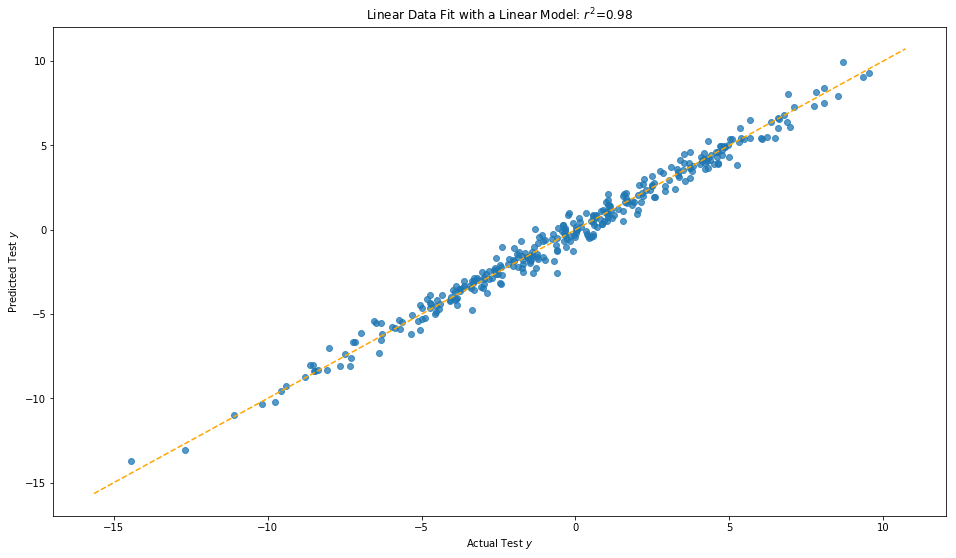

In [767]:
plt.scatter(y_test, linear_preds, alpha=0.75)
abline(0, 1)
plt.xlabel('Actual Test $y$');
plt.ylabel('Predicted Test $y$');
plt.title('Linear Data Fit with a Linear Model: $r^2$=%0.2f' % r2);

Now, let's change it up. We will add an "interaction" term. The new generating model is

$$ y = x_1 + x_2 + 5x_1 x_2 + \text{random noise}$$

In [768]:
y = X[:,0] + X[:,1] + 5*X[:,0]*X[:,1] + random_noise

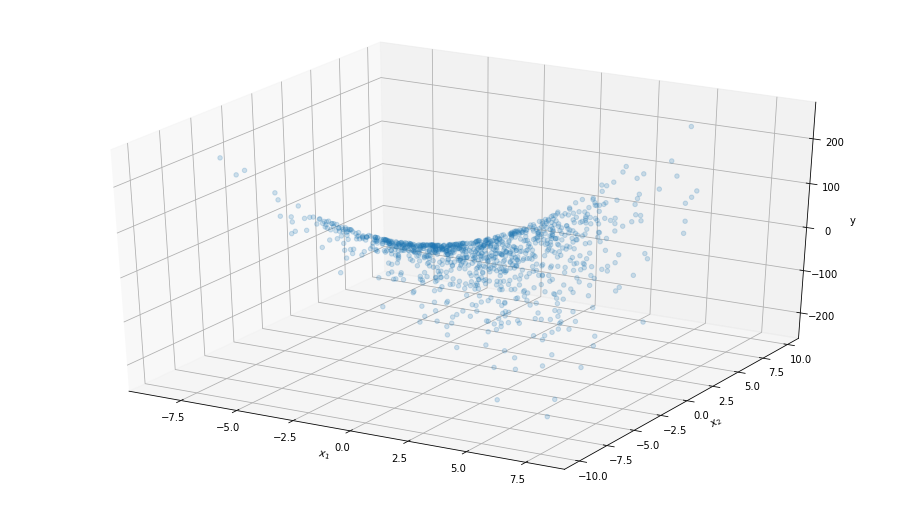

In [769]:
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], y, alpha=0.2);
ax.set_zlabel('y');
ax.set_xlabel('$x_1$');
ax.set_ylabel('$x_2$');

In [770]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [771]:
mod_reg = LinearRegression()
mod_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [772]:
linear_preds = mod_reg.predict(X_test)

In [773]:
r2 = mod_reg.score(X_test, y_test)

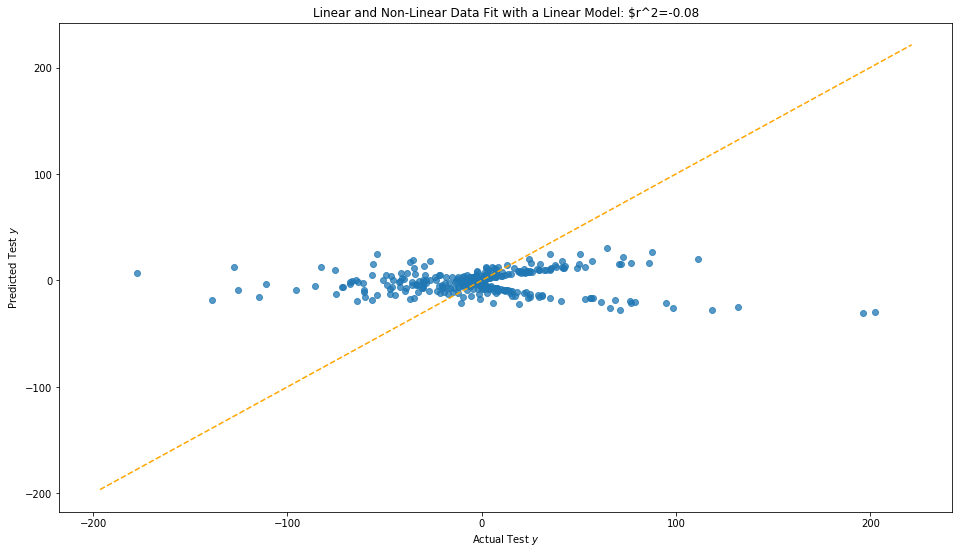

In [774]:
plt.scatter(y_test, linear_preds, alpha=0.75)
abline(0, 1)
plt.xlabel('Actual Test $y$');
plt.ylabel('Predicted Test $y$');
plt.title('Linear and Non-Linear Data Fit with a Linear Model: $r^2=%0.2f' % r2);

The linear model, on it's own, cannot find the interaction term. However a machine learning model can. Machine learning means the algorithm finds the rules without explicitly being told (here the rule is that the data is of the form $x_1 + x_2 + 5x_1 x_2$). Here, we can use a decision tree machine learning model.

In [775]:
mod_SVR = SVR(C=500, kernel='rbf', epsilon=0.25)
mod_SVR.fit(X_train, y_train)
preds_SVR = mod_SVR.predict(X_test)

In [776]:
mod_SVR.score(X_test, y_test)

0.84721881550624945

In [790]:
mod_tree = RandomForestRegressor(n_estimators=100, bootstrap=False, max_features=None, max_depth=None, min_samples_leaf=5)
mod_tree.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [791]:
mod_tree.score(X_test, y_test)

0.88586632738583504

In [792]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
    mod_tree.estimators_[0],
    feature_names = ['x1', 'x2'],
    out_file=None,
    filled=True, rounded=True,
    special_characters=True,
    rotate=True
)
#graph = graphviz.Source(dot_data, format='png')

In [793]:
import pydotplus
pydot_graph = pydotplus.graph_from_dot_data(dot_data)

In [794]:
tree_preds = mod_tree.predict(X_test)

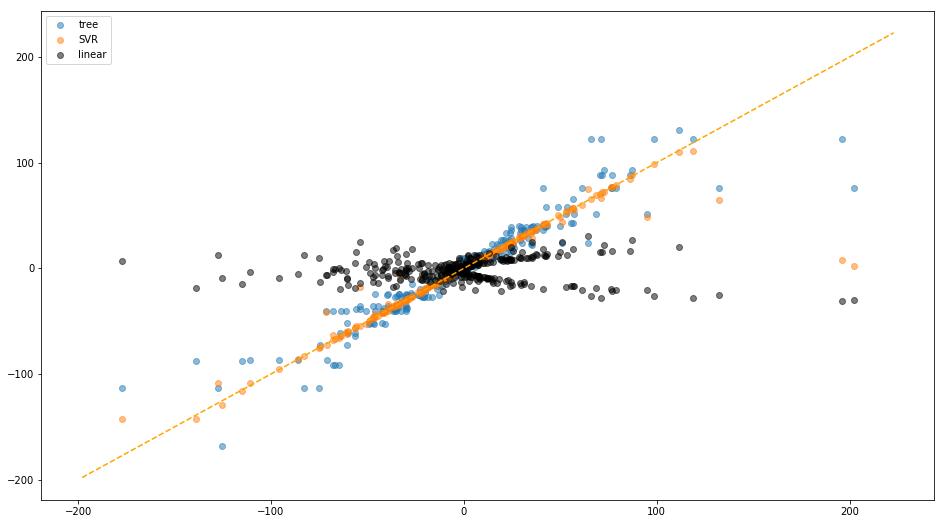

In [795]:
plt.scatter(y_test, tree_preds, alpha=0.5)
plt.scatter(y_test, preds_SVR, alpha=0.5)
plt.scatter(y_test, linear_preds, c='k', alpha=0.5)
plt.legend(labels=['tree', 'SVR', 'linear'])
abline(0, 1)

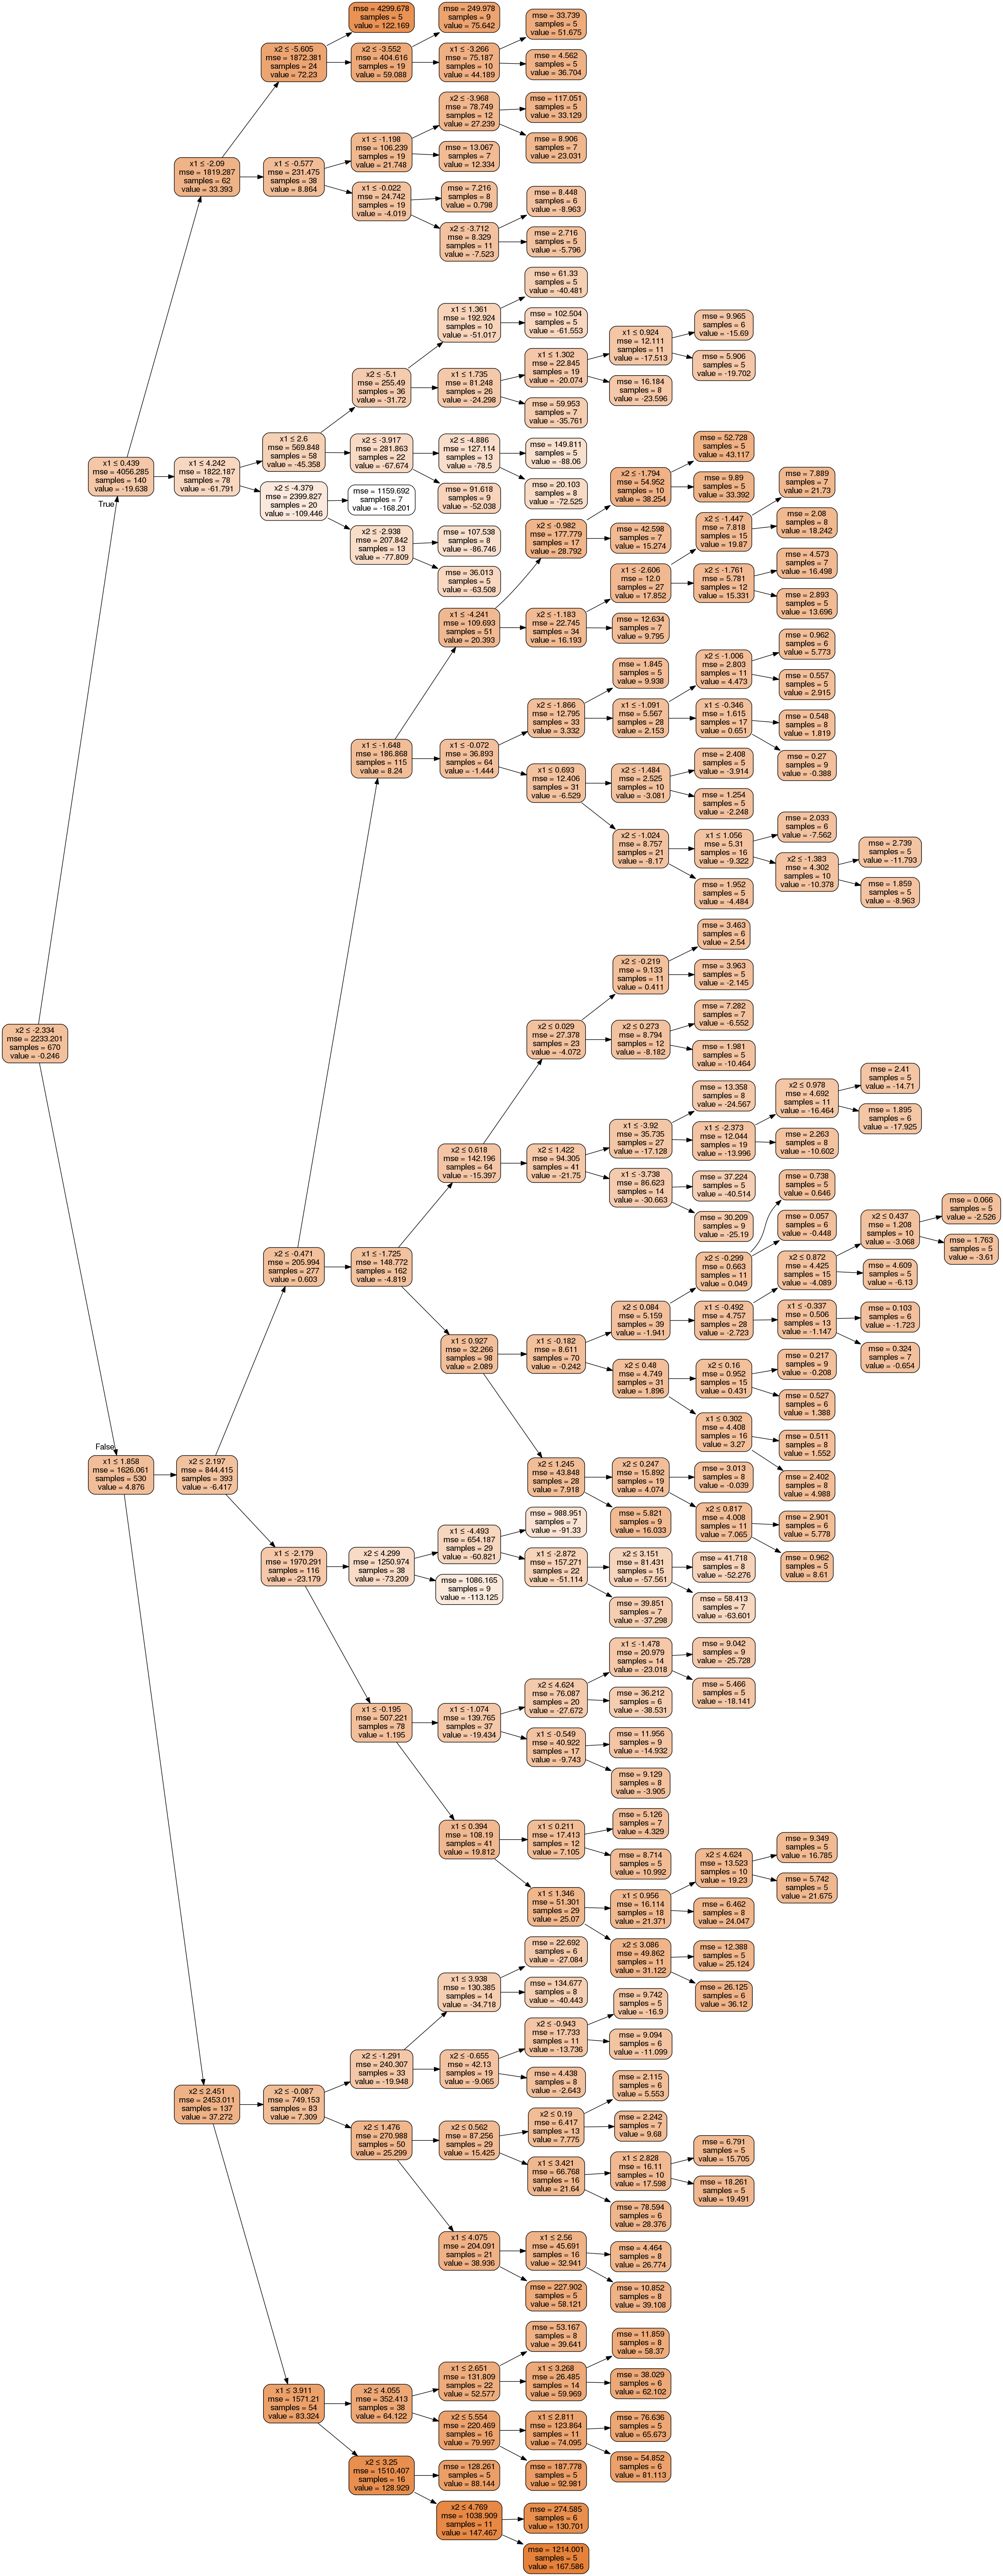

In [797]:
from IPython.display import Image
Image(pydot_graph.create_png())

In [798]:
mod_tree = RandomForestRegressor(n_estimators=1000, min_samples_leaf=3)
mod_tree.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [799]:
mod_tree.score(X_test, y_test)

0.92942465429476684

In [800]:
tree_preds = mod_tree.predict(X_test)

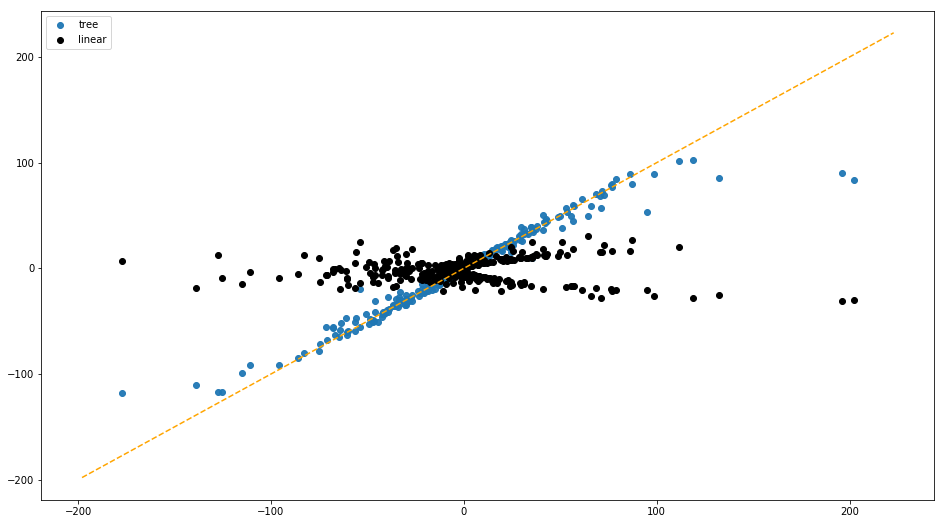

In [801]:
plt.scatter(y_test, tree_preds, alpha=0.95)
plt.scatter(y_test, linear_preds, c='k')
plt.legend(labels=['tree', 'linear'])
abline(0, 1)

Create data with one conditional leaky feature.

In [839]:
np.random.seed(10)
n_samples = 10000
x1 = np.random.normal(loc=0.5, scale=1, size=(n_samples,))
x2 = np.random.normal(loc=0.75, scale=1, size=(n_samples,))
random_noise = np.random.normal(scale=5, size=(n_samples,))
y = x1 + x2 + random_noise

In [840]:
elements = [0, 1]
probabilities = [0.20, 0.80]
flag = np.random.choice(elements, n_samples, p=probabilities)
leaky = np.where(flag==0, y, np.random.normal(scale=10, size=(n_samples,)))
#leaky = np.where(flag==0, y+np.random.normal(scale=0.25, size=(n_samples,)), np.random.normal(scale=10, size=(n_samples,)))

In [841]:
X = np.column_stack([x1, x2, flag, leaky])

In [842]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [843]:
X_test.shape

(3300, 4)

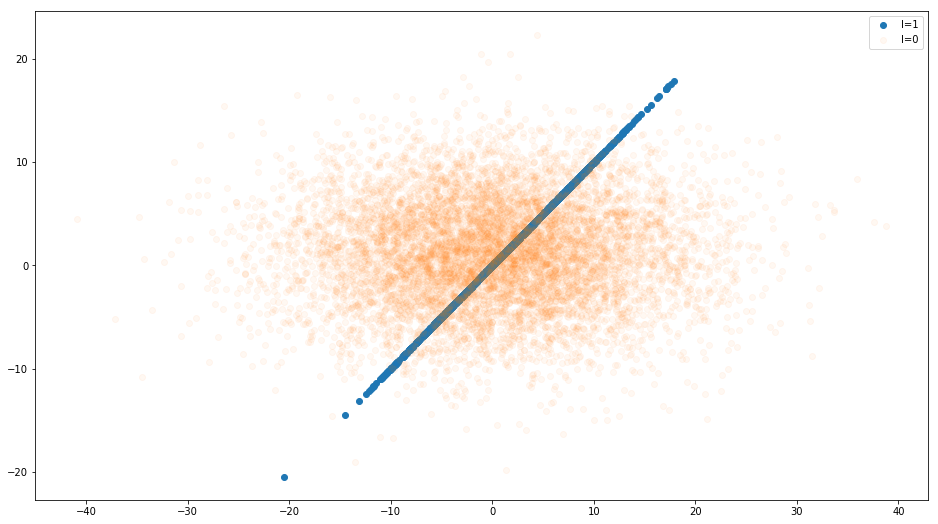

In [844]:
plt.scatter(X[X[:,2]==0, 3], y[X[:,2]==0])
plt.scatter(X[X[:,2]!=0, 3], y[X[:,2]!=0], alpha=0.05)
plt.legend(['I=1', 'I=0']);

In [845]:
mod_reg = LinearRegression()
mod_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [846]:
mod_reg.score(X_test, y_test)

0.091844270840503839

In [847]:
for i, B in enumerate(mod_reg.coef_):
    print("B"+str(i+1) + ":\t" + str(np.round(B,3)))

B1:	0.906
B2:	1.021
B3:	-0.149
B4:	0.059


In [848]:
mod_reg.score(X_test[X_test[:,2]==0], y_test[X_test[:,2]==0])

0.1801162993096671

In [849]:
preds_linear = mod_reg.predict(X_test)

In [850]:
#plt.scatter(y_test, preds_linear, alpha=0.95)

In [851]:
#mod_tree = RandomForestRegressor(n_estimators=1, max_depth=3,  min_samples_leaf=3)
mod_tree = DecisionTreeRegressor(max_depth=3,  min_samples_leaf=3)
mod_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [852]:
dot_data = export_graphviz(
    mod_tree, # mod_tree.estimators_[0],
    feature_names = ['x1', 'x2', 'sector', 'x3'],
    out_file=None,
    proportion=True,
    filled=True, rounded=True,
    special_characters=True,
    rotate=False)
#graph = graphviz.Source(dot_data, format='png')

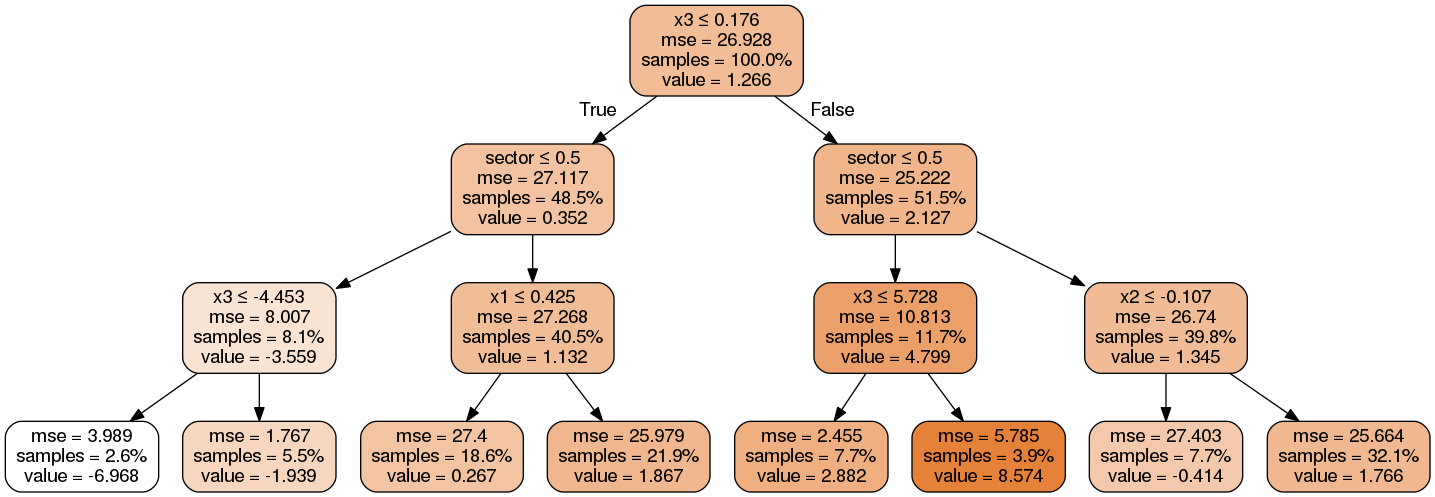

In [853]:
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
Image(pydot_graph.create_png())

In [854]:
mod_tree.score(X_test, y_test)

0.1944235572905163

In [855]:
(27.117*(0.485) + 25.222*0.515)

26.141075

In [856]:
y_train.mean()

1.2660882090274064

In [857]:
mod_tree.score(X_test[X_test[:, 2]==0], y_test[X_test[:, 2]==0])

0.88155431463950795

In [832]:
0.88/0.19

4.631578947368421

In [859]:
!pip install dtreeviz

dtreeviz requires Python '>=3.6' but the running Python is 3.5.5


In [858]:
from dtreeviz.trees import *

ImportError: No module named 'dtreeviz'

In [833]:
preds_tree = mod_tree.predict(X_test)

In [834]:
#plt.scatter(y_test[X_test[:,2]==0], preds_tree[X_test[:,2]==0], alpha=0.5)
#plt.scatter(y_test[X_test[:,2]==0], preds_linear[X_test[:,2]==0], alpha=0.5)
#plt.legend(['I/=1', 'I=0']);

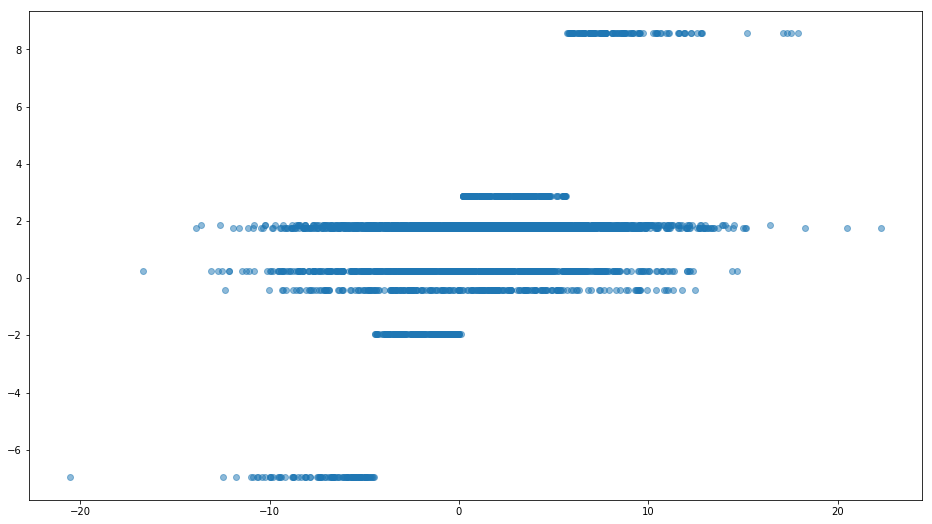

In [835]:
plt.scatter(y_test, preds_tree, alpha=0.5)
#plt.scatter(y_test, preds_linear, alpha=0.5)

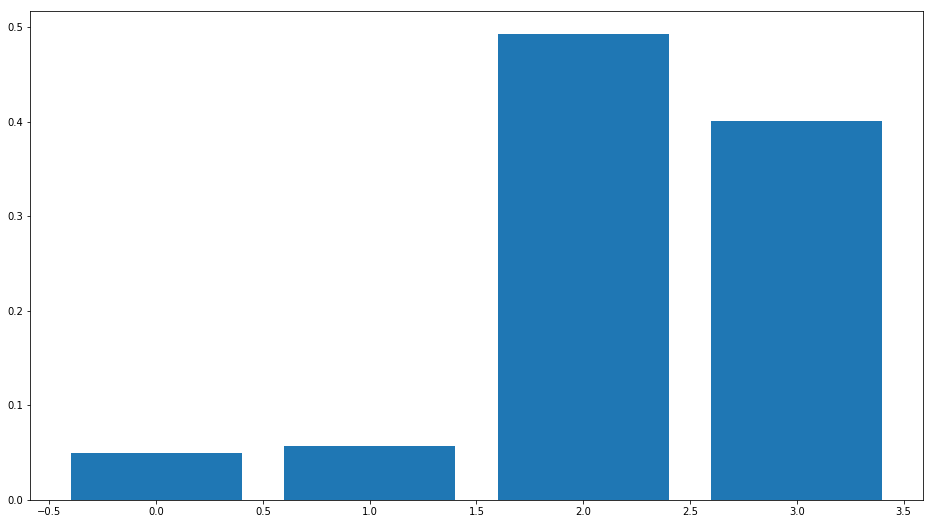

In [837]:
plt.bar(range(4),mod_tree.feature_importances_);

In [374]:
X_train.shape

(670, 4)

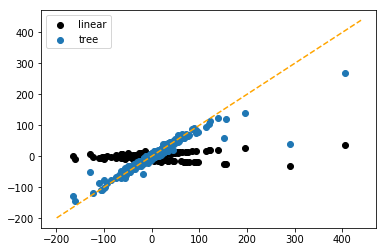

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

def abline(intercept, slope):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', c='orange')

X = np.random.normal(scale=3, size=(1000, 2))
random_noise = np.random.normal(scale=5, size=(1000,))
y = X[:,0] + X[:,1] + 5*X[:,0]*X[:,1] + random_noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

mod_reg = LinearRegression()
preds_reg = mod_reg.fit(X_train, y_train).predict(X_test)

mod_tree = RandomForestRegressor(n_estimators=100)
preds_tree = mod_tree.fit(X_train, y_train).predict(X_test)

plt.scatter(y_test, preds_reg, c='k')
plt.scatter(y_test, preds_tree)
plt.legend(labels=['linear', 'tree'])
abline(0, 1)

In [738]:
n_samples = 10000
x1 = np.random.normal(loc=0.5, scale=1, size=(n_samples,))
x2 = np.random.normal(loc=0.75, scale=1, size=(n_samples,))
random_noise = np.random.normal(scale=5, size=(n_samples,))
y = x1 + x2 + random_noise

elements = [0, 1]
probabilities = [0.20, 0.80]
flag = np.random.choice(elements, n_samples, p=probabilities)
leaky = np.where(flag==0, y, np.random.normal(scale=10, size=(n_samples,)))
X = np.column_stack([x1, x2, flag, leaky])

In [739]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

mod_reg = LinearRegression().fit(X_train, y_train)
preds_reg = mod_reg.predict(X_test)

mod_tree = RandomForestRegressor(n_estimators=1000, min_samples_leaf=3).fit(X_train, y_train)
preds_tree = mod_tree.predict(X_test)

In [740]:
print(mod_reg.score(X_test, y_test))
print(mod_reg.score(X_test[X_test[:, 2]==0], y_test[X_test[:, 2]==0]))

0.0610796852093
0.140946827667


In [741]:
print(mod_tree.score(X_test, y_test))
print(mod_tree.score(X_test[X_test[:, 2]==0], y_test[X_test[:, 2]==0]))

0.175594757301
0.999790235233


In [69]:
from sklearn.ensemble import GradientBoostingRegressor

In [70]:
mod_gbdt = GradientBoostingRegressor(learning_rate=0.2, n_estimators=125, max_depth=3, subsample=0.61).fit(X_train, y_train)

In [71]:
preds_gbdt = mod_tree.predict(X_test)

In [72]:
print(mod_gbdt.score(X_test, y_test))
print(mod_gbdt.score(X_train[X_train[:, 2]==0], y_train[X_train[:, 2]==0]))
print(mod_gbdt.score(X_test[X_test[:, 2]==0], y_test[X_test[:, 2]==0]))

0.260265186981
0.940866513347
0.745708434708


In [73]:
feature = flag*leaky

In [74]:
X = np.column_stack([X, feature])

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

mod_reg = LinearRegression().fit(X_train, y_train)
preds_reg = mod_reg.predict(X_test)

mod_tree = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)
preds_tree = mod_tree.predict(X_test)

print(mod_reg.score(X_test, y_test))
print(mod_reg.score(X_test[X_test[:, 2]==0], y_test[X_test[:, 2]==0]))

print(mod_tree.score(X_test, y_test))
print(mod_tree.score(X_test[X_test[:, 2]==0], y_test[X_test[:, 2]==0]))

0.392197907159
0.848660967116
0.318985226955
0.899907954814


In [838]:
import lmt